## First we need to load the web page
To load the web page we will take the help of selenium webdriver framework.   
It is a frame-work for automating the web browser and performing web application testing. 

Let's initialize the selenium webdriver

In [1]:
from selenium import webdriver
chrome_driver_path = '/Users/pritul/Downloads/chromedriver'
driver = webdriver.Chrome(chrome_driver_path)

/opt/miniconda3/envs/intel/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  This is separate from the ipykernel package so we can avoid doing imports until


This will pop-up with a screen like this and written as "Chrome is controlled by automated test software"
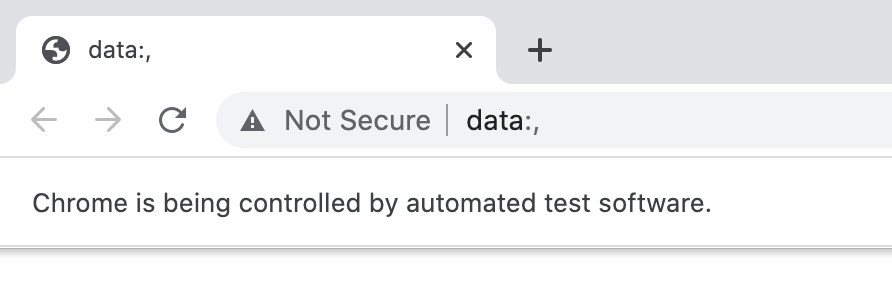

Next step is to fetch the url 

In [2]:
flipkart_url = "https://www.flipkart.com/"
driver.get(flipkart_url)

This will automatically opens the flipkart website
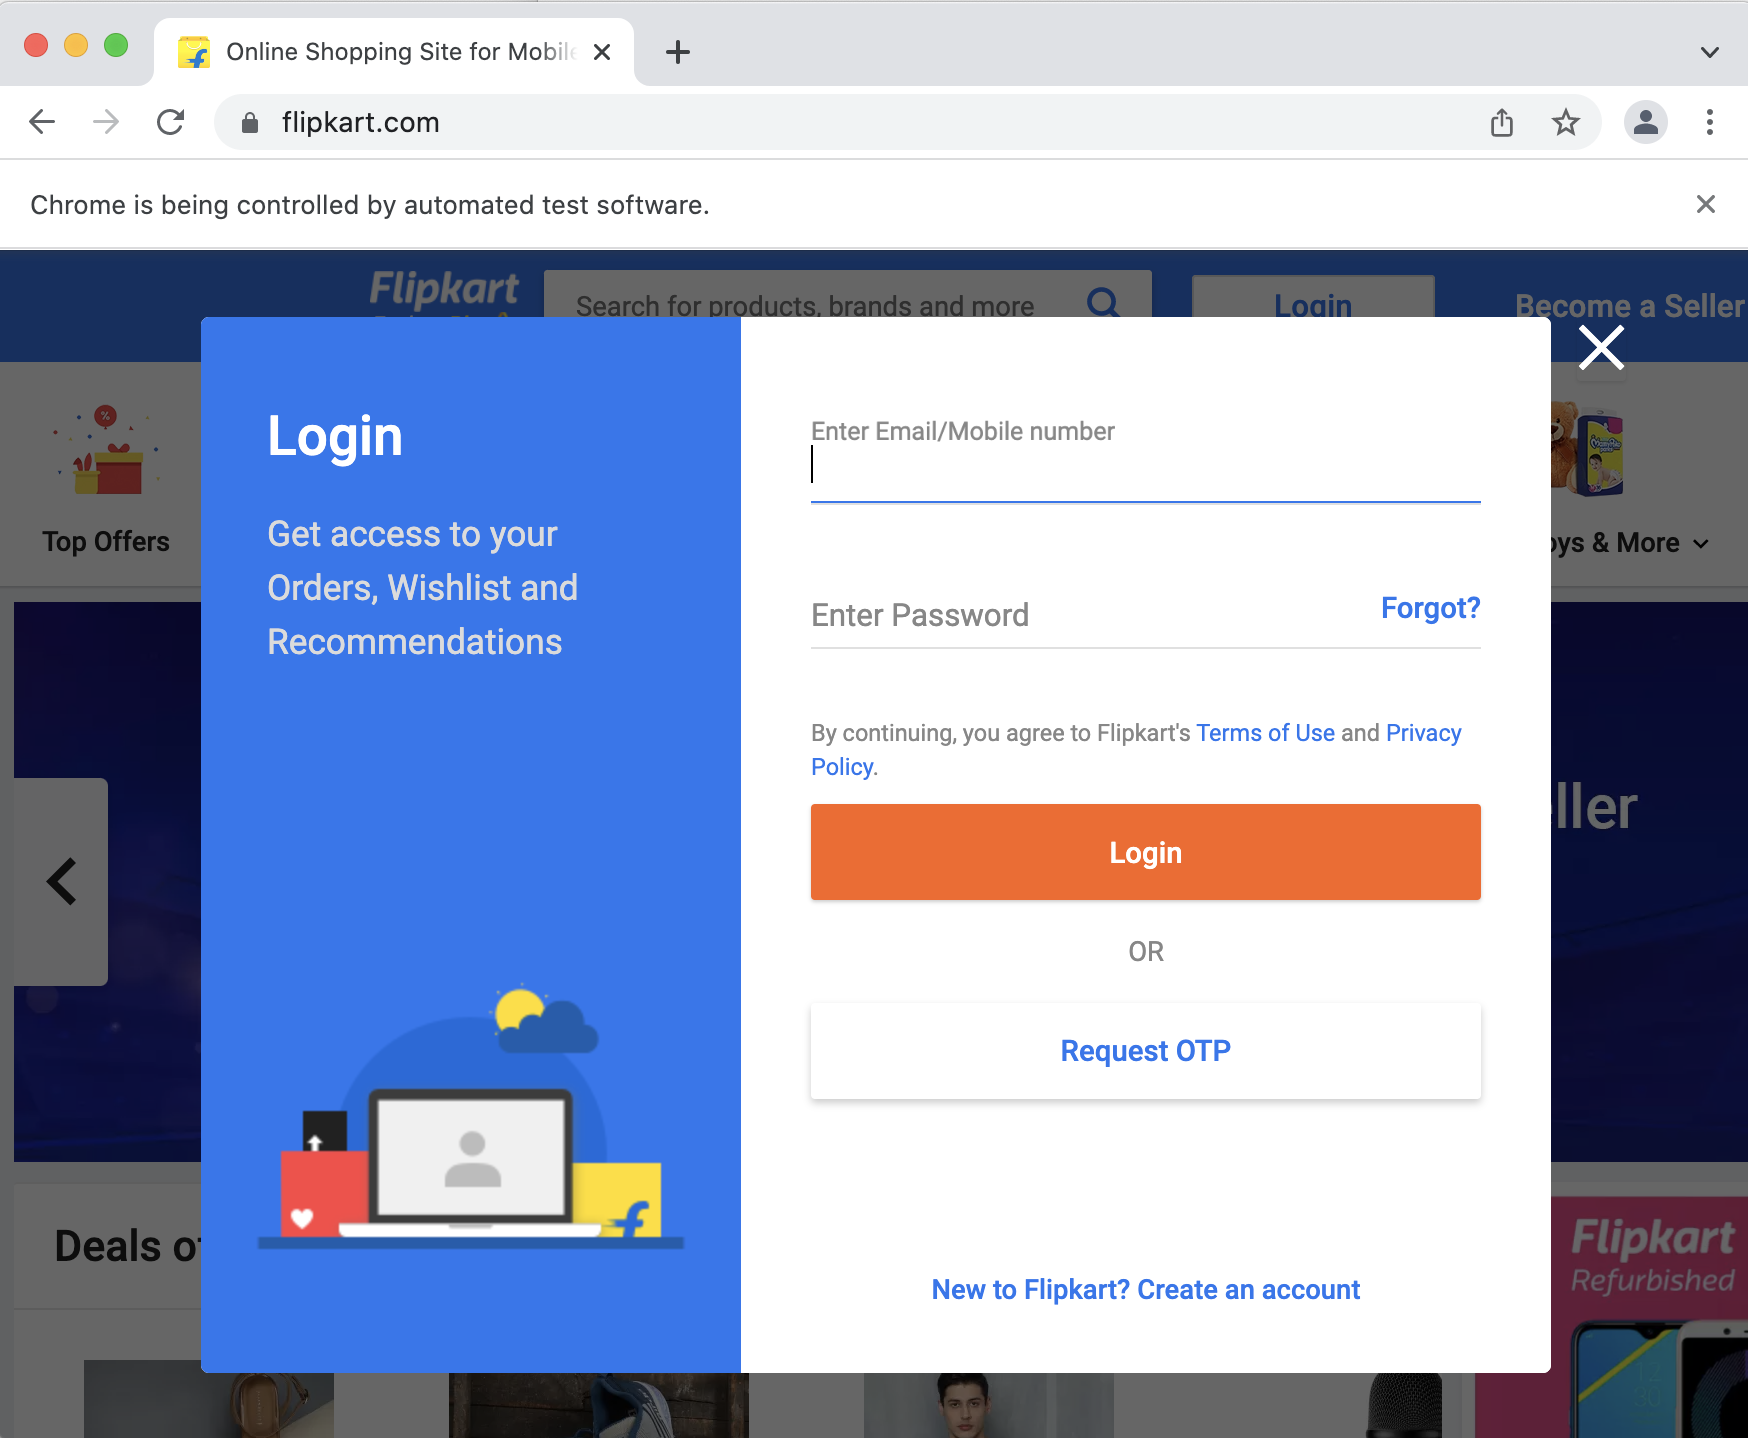

Now here we got an issue. We need to close this login pop. 

Make an inspect element (you can find it by right clicking in chrome) and hover mouse at the close icon. You will find its class element id. In my case it is _2KpZ6l._2doB4z
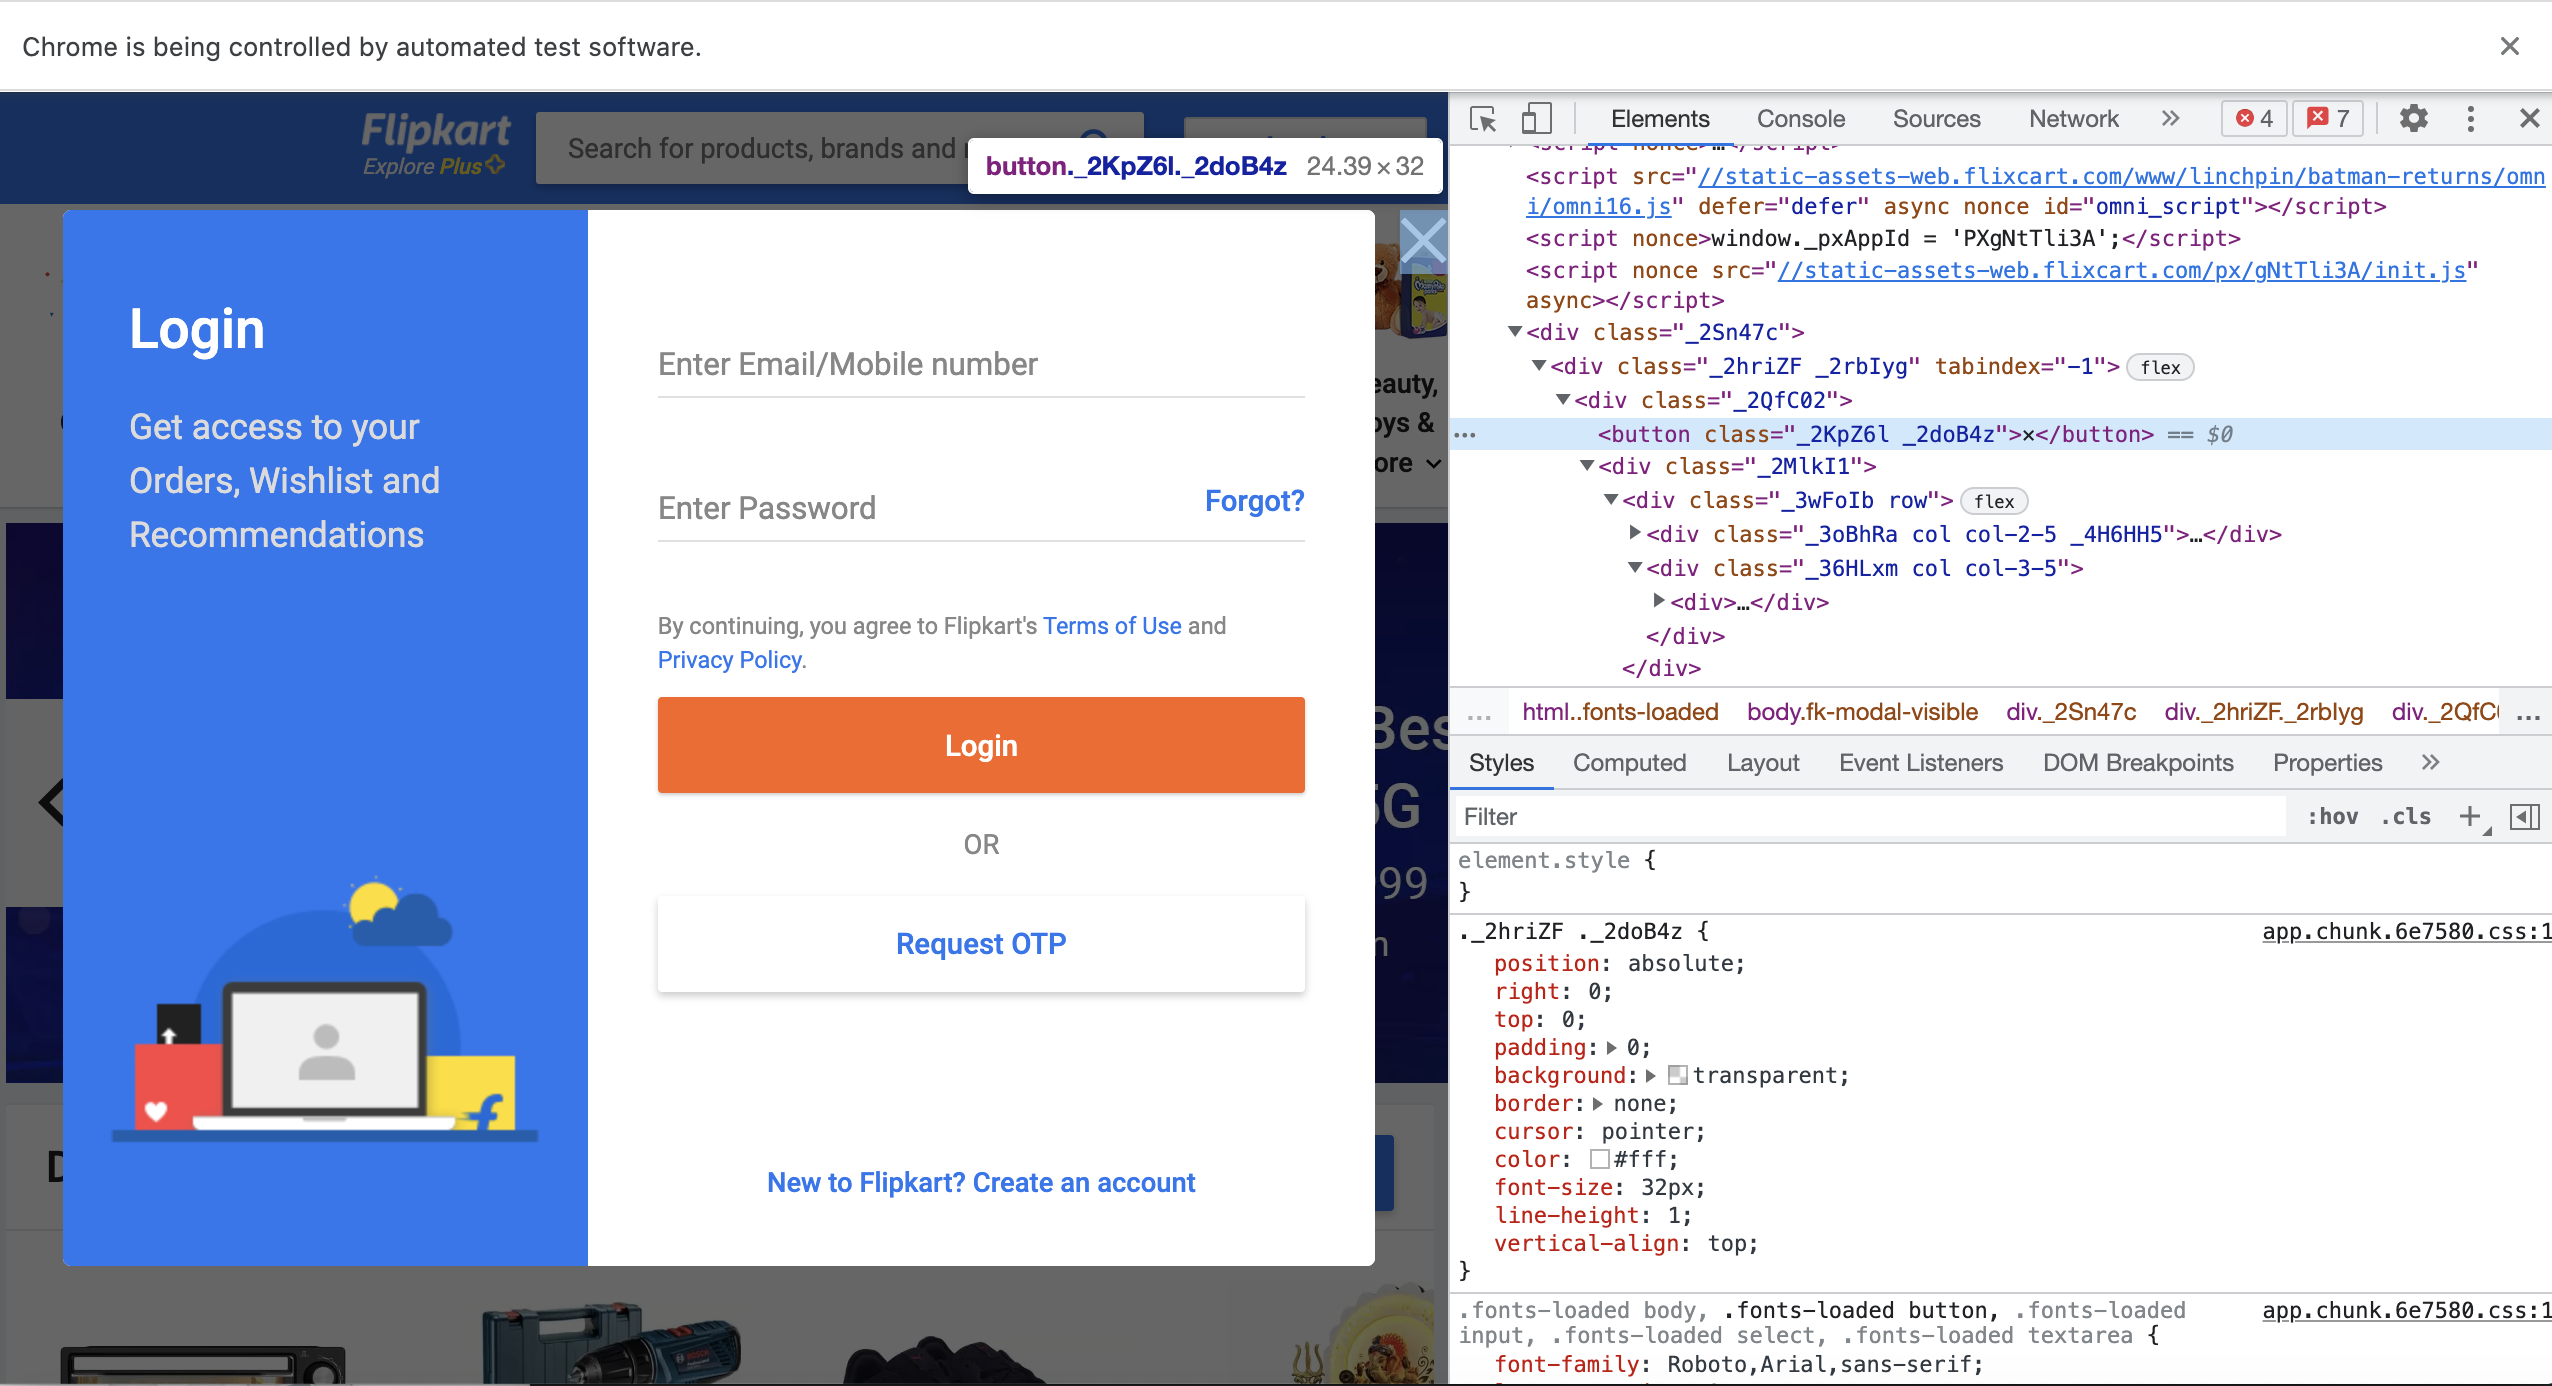

So to close the pop-up, we will tell driver to find this particular class element id and will tell webdriver to click on it.

In [3]:
login_pop = driver.find_element_by_class_name('_2KpZ6l._2doB4z')
login_pop.click()

/opt/miniconda3/envs/intel/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  """Entry point for launching an IPython kernel.


Now we will go to the search field. I will inspect over the search field and obtain the input class id. In my case it is _3704LK

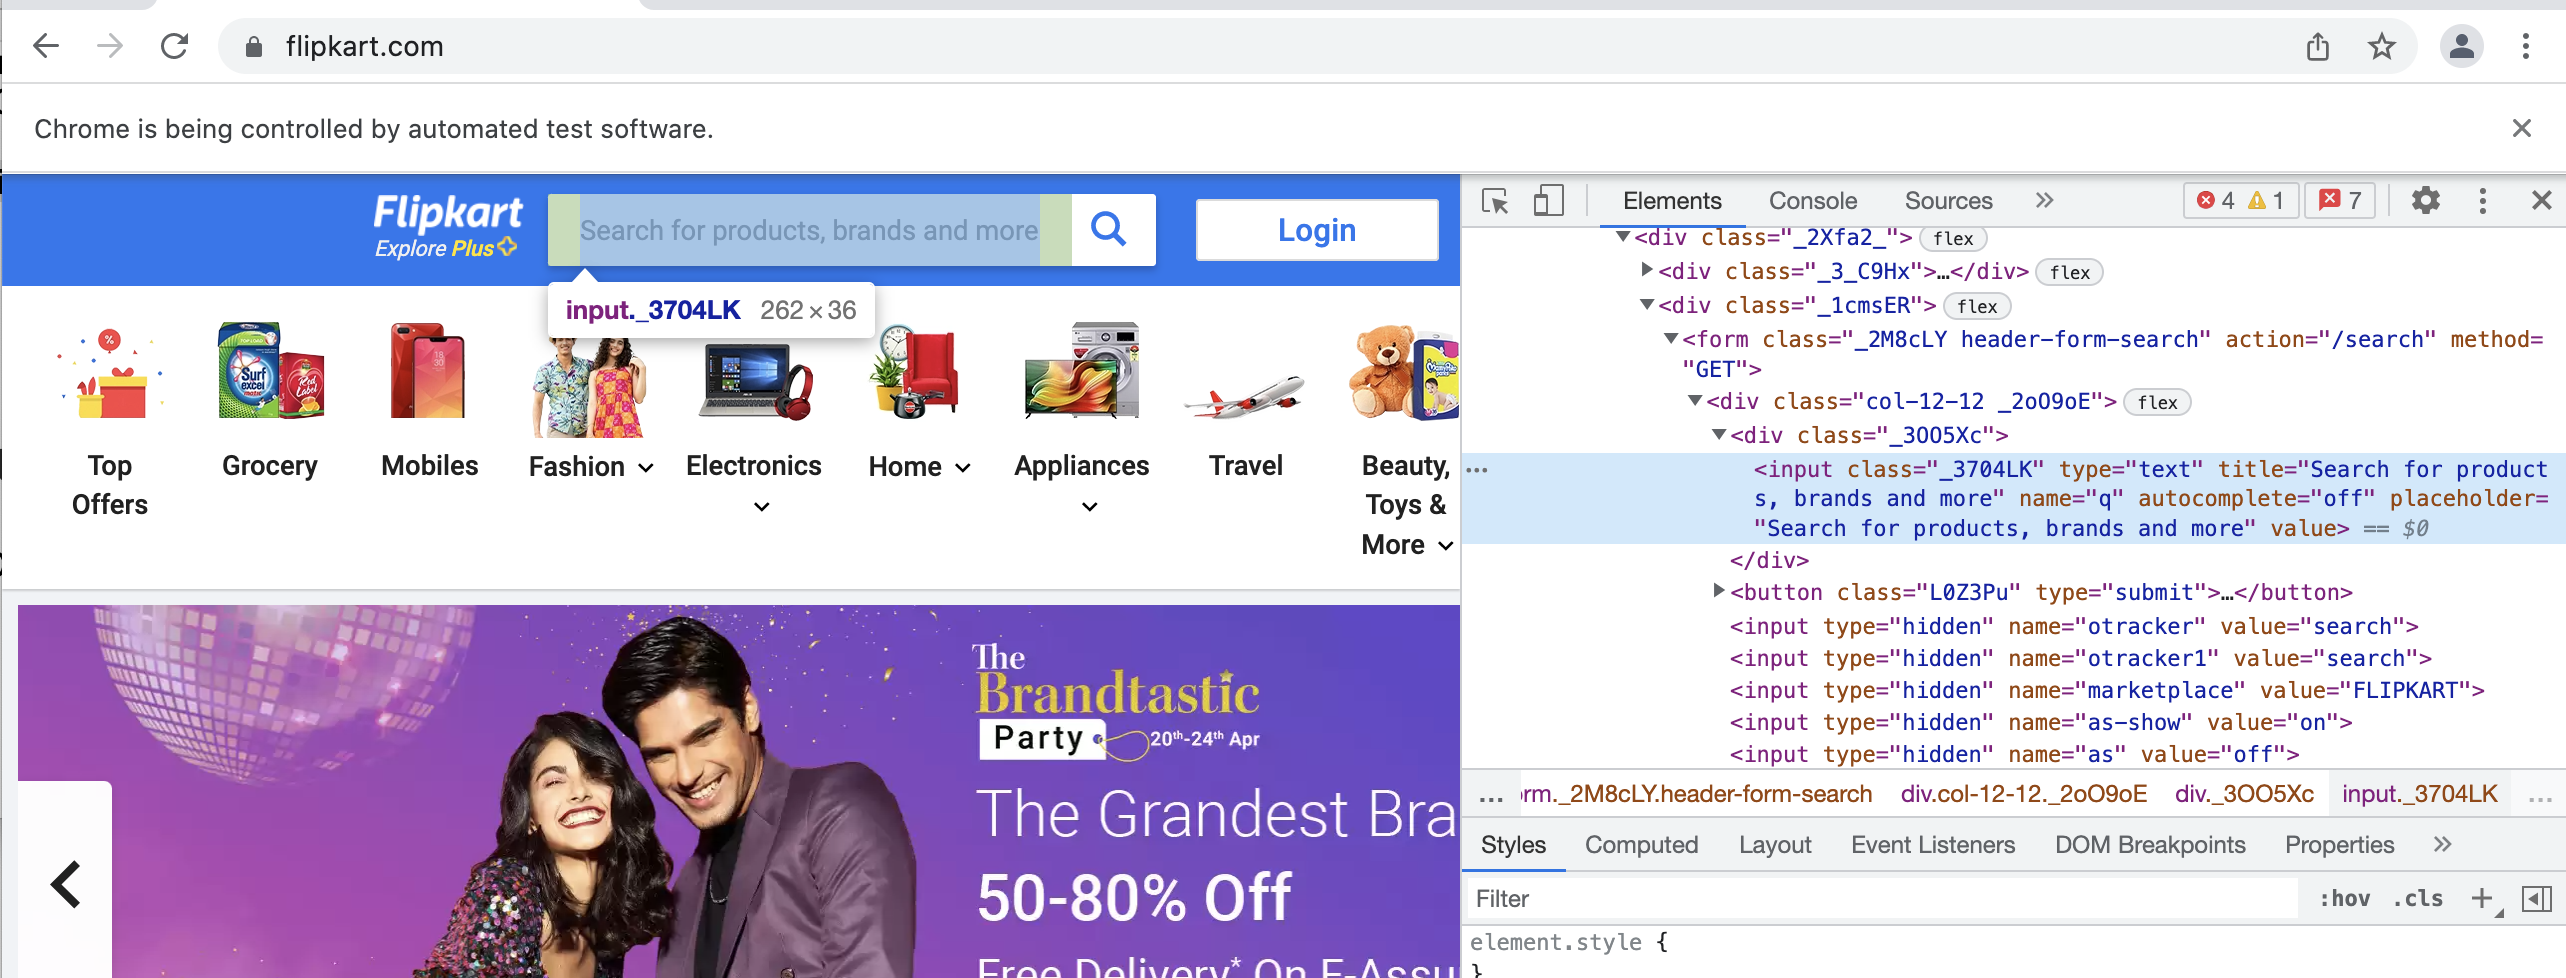

Now I will tell webdriver to find element by class name. Thereafter, to send the text there is function called send_keys()

In [4]:
search_query = driver.find_element_by_class_name('_3704LK')
search_query.send_keys('smartphone')

/opt/miniconda3/envs/intel/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  """Entry point for launching an IPython kernel.


After that we will click on search button by fetching its class name and performing click().
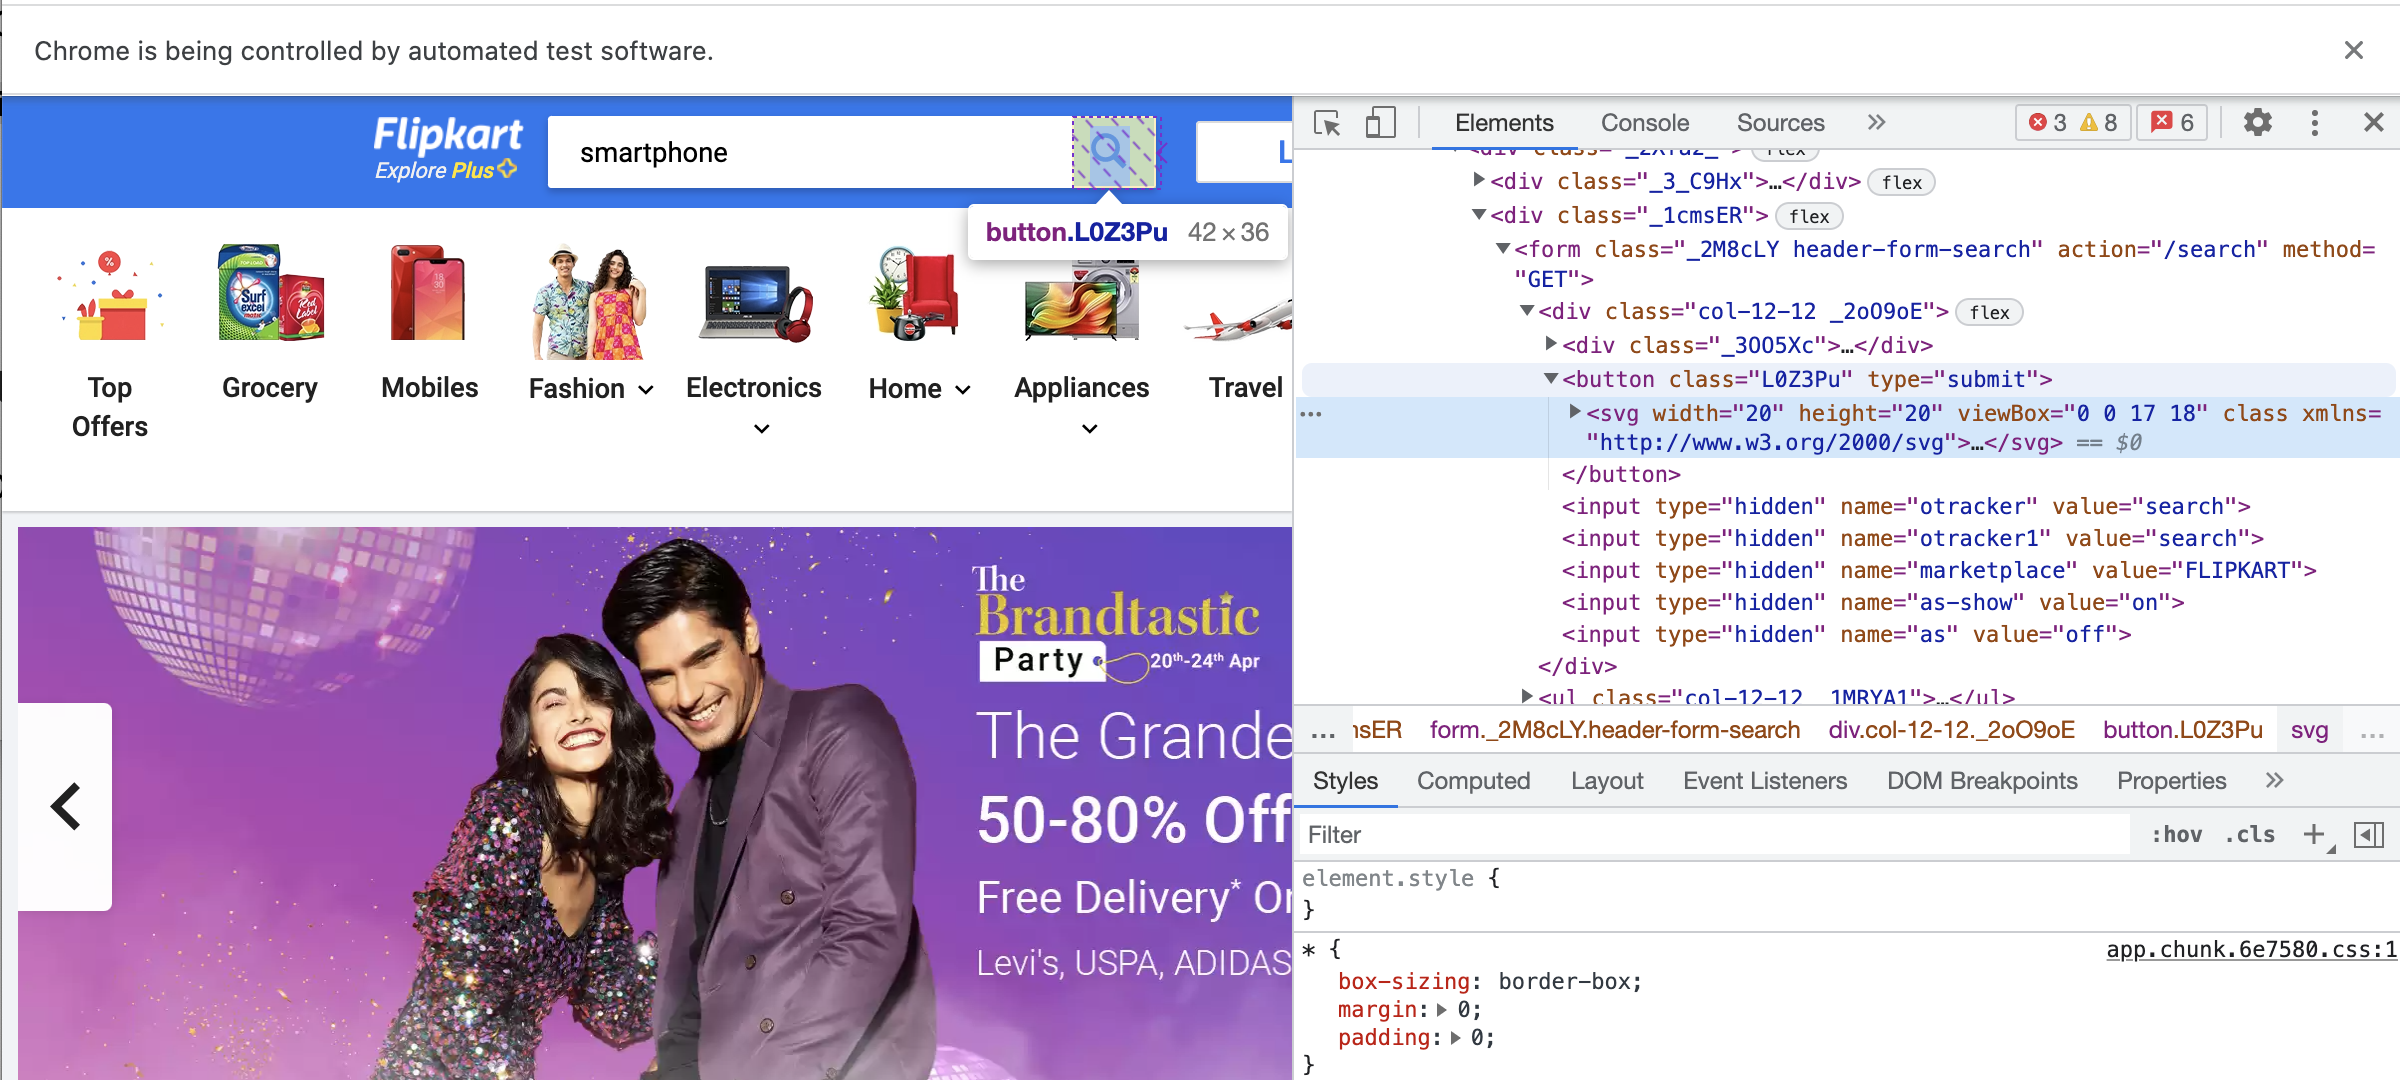

In [5]:
driver.find_element_by_class_name('L0Z3Pu').click()

/opt/miniconda3/envs/intel/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  """Entry point for launching an IPython kernel.


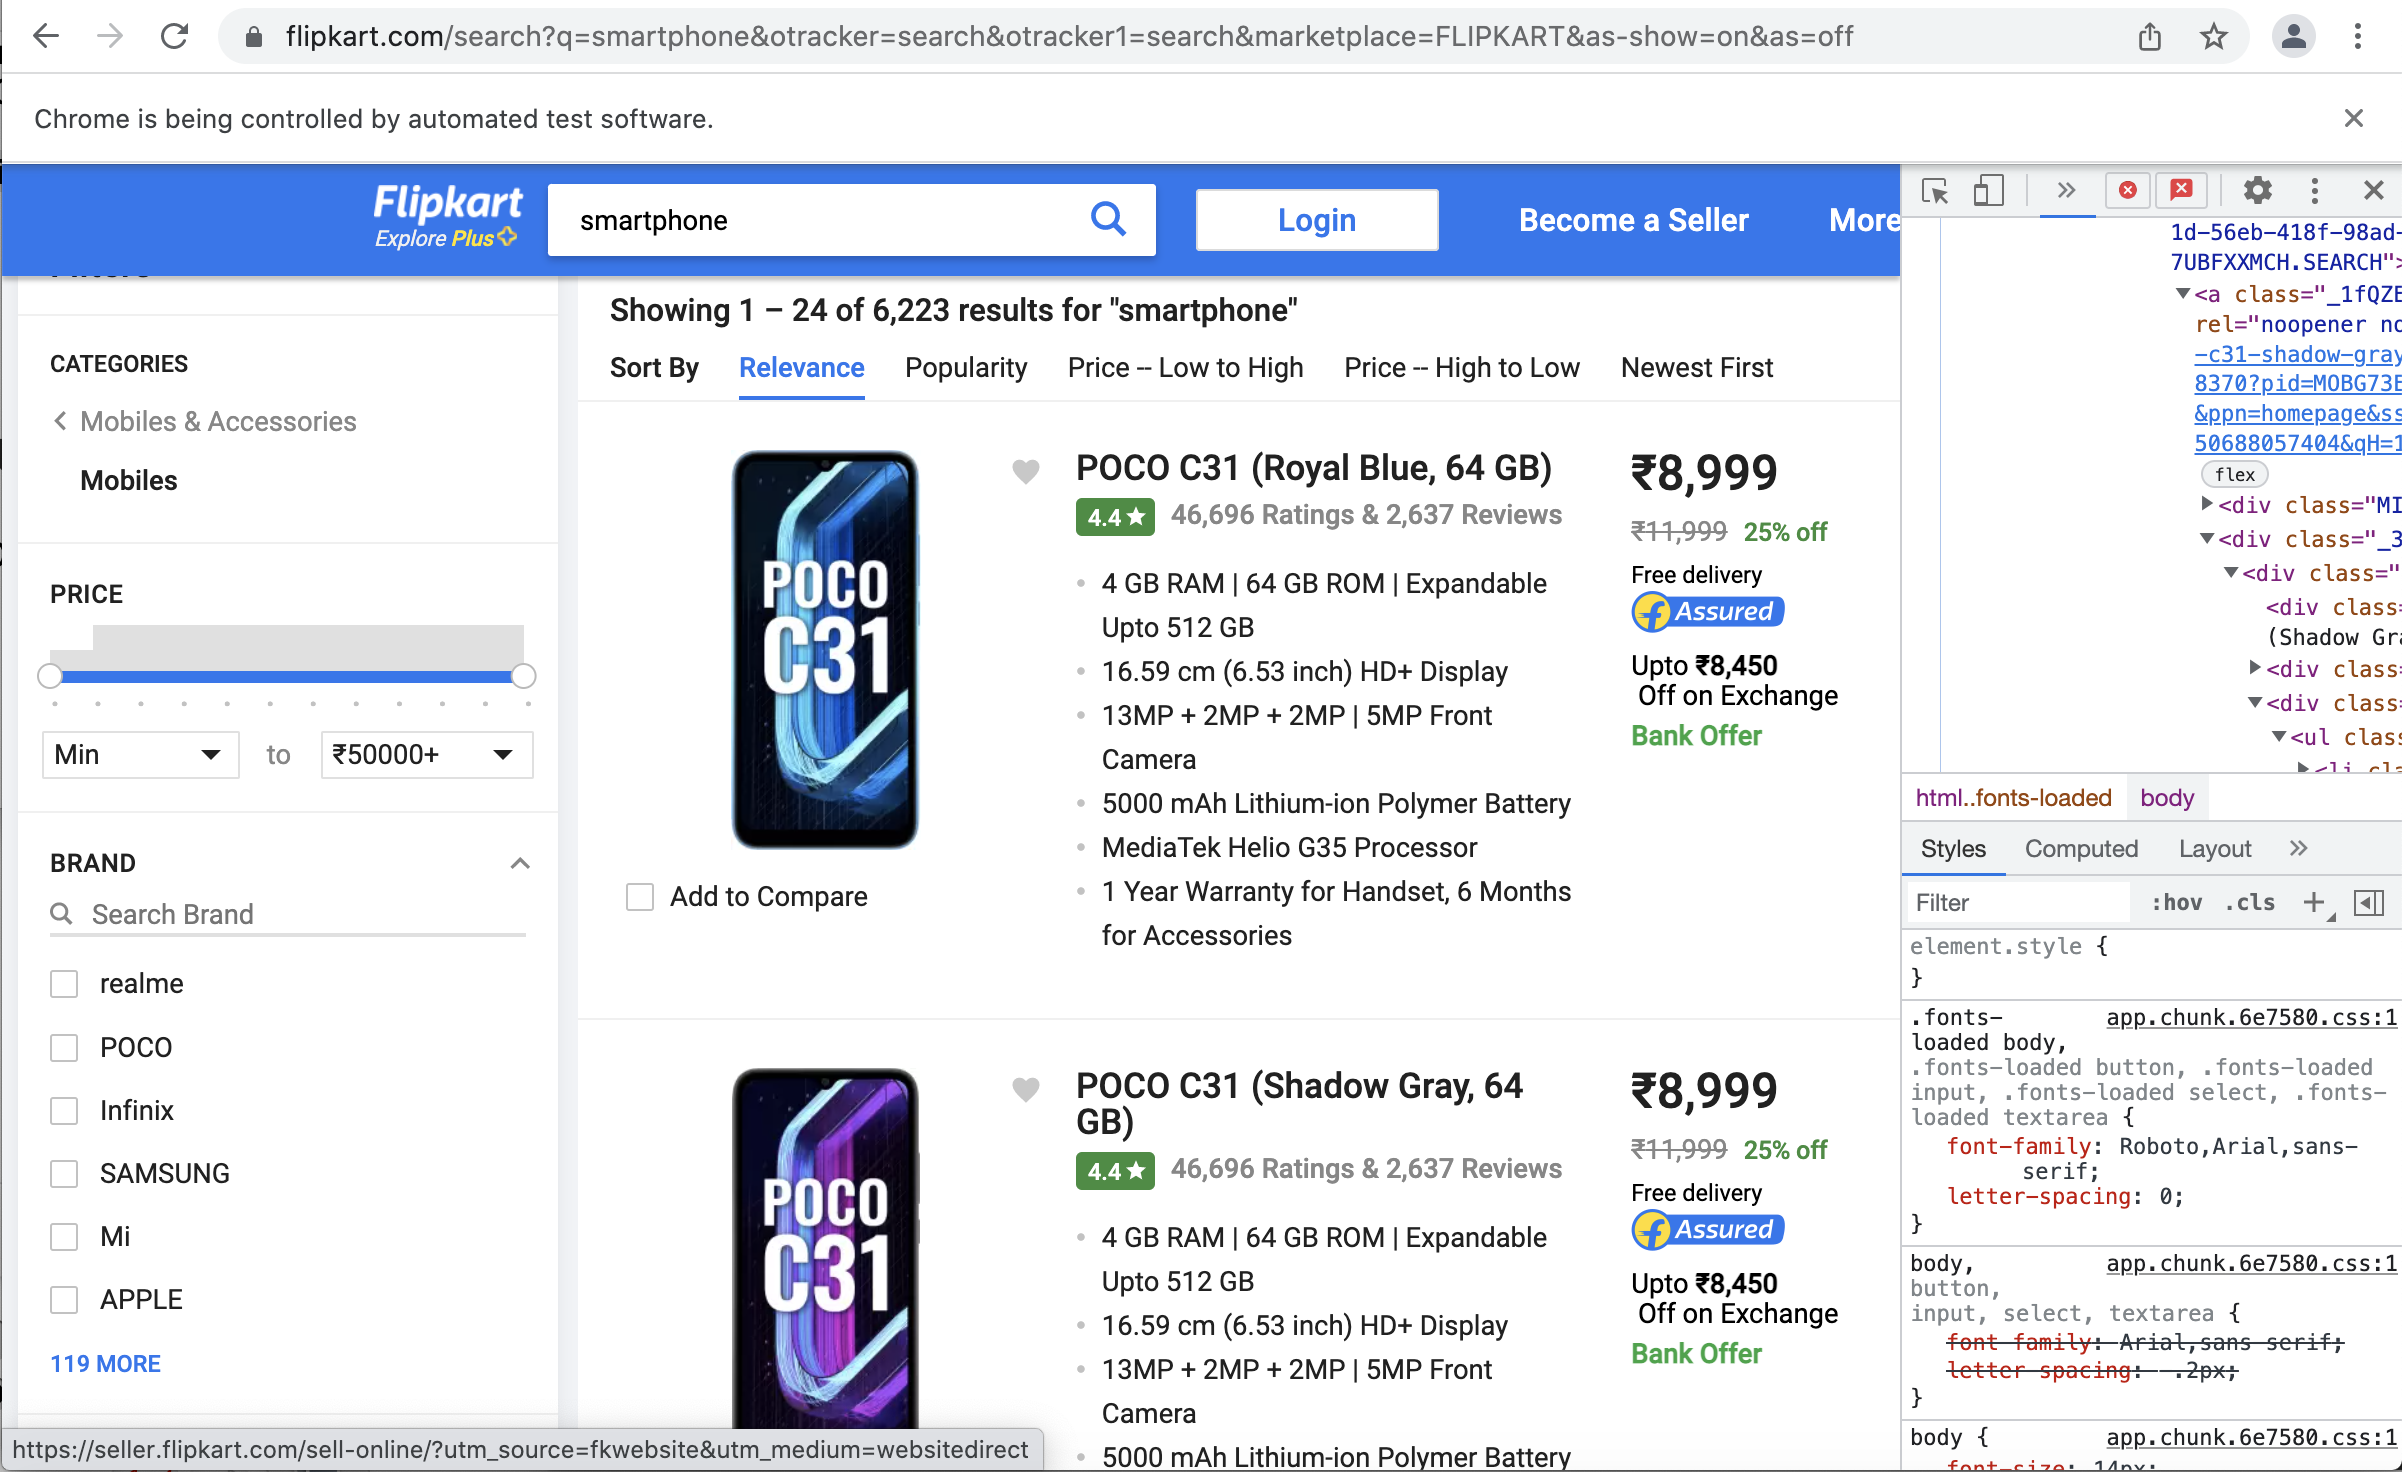

Now to extract the information we willl use the beautiful soup library.    
We will pass the whole html web page information using driver.page_source.   
Before executing it wait for 30 second to load properly and synchronize

In [9]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')

Now we will first access all the div tags and out of that filter with _1AtVbE col-12-12. This will return the list of all applicable class tag. This is not a simple list but it is list having data type bs4.element.Tag
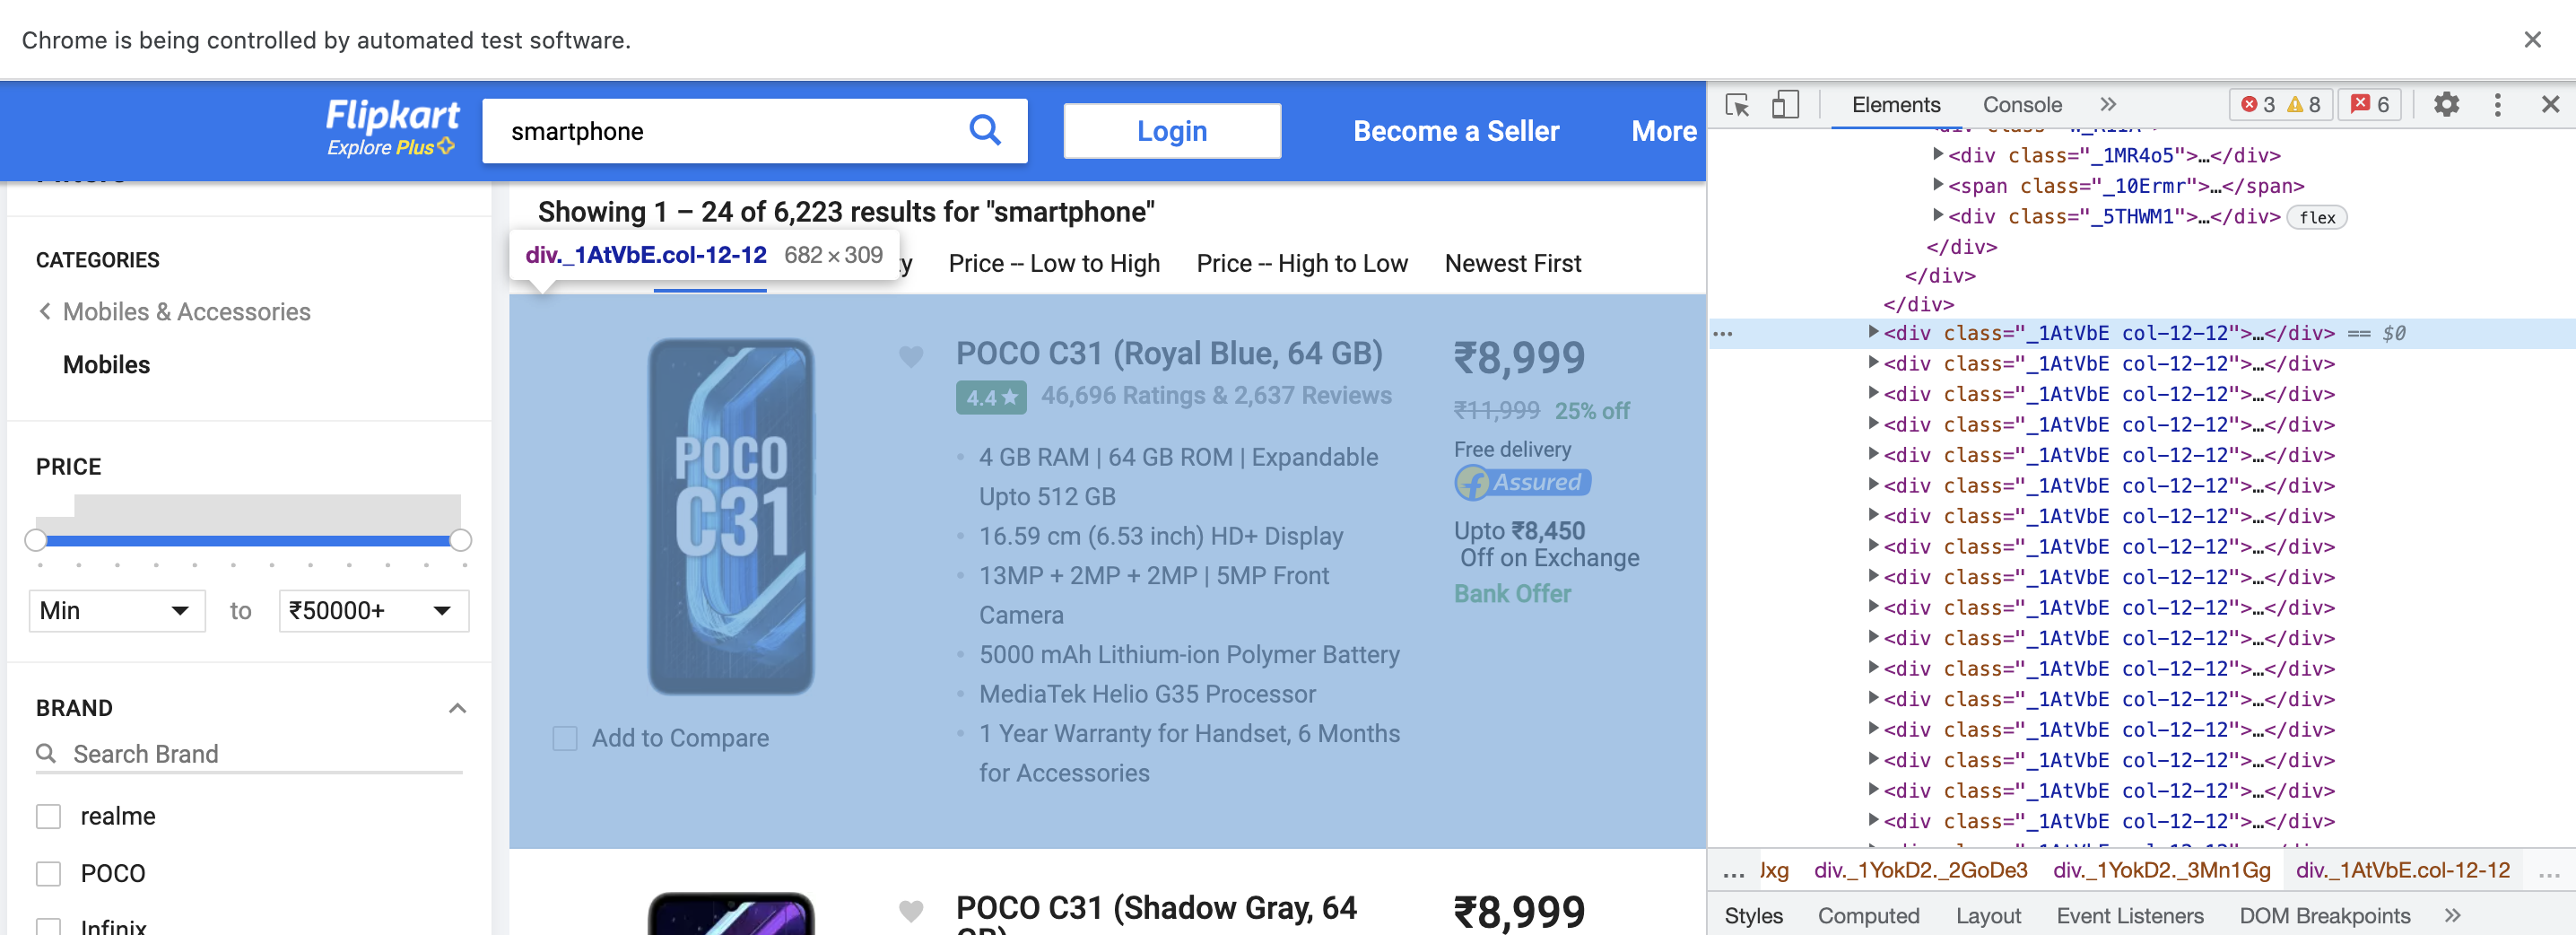

In [10]:
mobile_phones_list = soup.find_all('div',class_='_1AtVbE col-12-12')
print(len(mobile_phones_list))

30


In [11]:
print(type(mobile_phones_list[0]))

<class 'bs4.element.Tag'>


We will iterate through the list and to access the information we will use dictionary indexing. We are starting itterator from 2nd index because first two are related to buying guide. We will use find_all to access the information and storing information in cleaned_mobile_list array.
  
We are using tqdm to display the progress bar

In [13]:
import tqdm
cleaned_mobile_list = []
for bs4_mobiles in tqdm.tqdm(mobile_phones_list[2:]):
    
    if len(bs4_mobiles.find_all('div',class_='_4rR01T'))==0:
        #To handle if we don't get value#
           continue
           
    mobile_name = bs4_mobiles.find_all('div',class_='_4rR01T')[0].text #Out of all possible div tags, I want for _4rR01T and its corresponding text#
    mobile_image = bs4_mobiles.find_all('img',class_='_396cs4')[0]['src'] #Out of all the images, I want image of class _396cs4#
    mobile_ratings = bs4_mobiles.find_all('span',class_='_2_R_DZ')[0].text #For finding the ratings#
    
    # Similarly we will store rest of the features in dictionary#
    _features = {'RAM':None,'Display':None,'Battery':None,'Processor':None,'Warranty':None,'Camera':None}
    for features in bs4_mobiles.find_all('div',class_='fMghEO')[0].find_all('li'):
        value = features.text
        if 'RAM' in value:
            _features['RAM'] = value
        elif 'Display' in value:
            _features['Display'] = value
        elif 'Battery' in value:
            _features['Battery'] = value
        elif 'Processor' in value:
            _features['Processor'] = value
        elif 'Warranty' in value:
            _features['Warranty'] = value
        elif 'Camera' in value:
            _features['Camera'] = value
    cleaned_mobile_list.append([mobile_name,mobile_image,mobile_ratings,_features['RAM'],_features['Display'],_features['Processor'],_features['Battery'],_features['Warranty'],_features['Camera']])

100%|███████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 826.06it/s]


Now we are creating the dataframe and I will display the dataframe using bamboolib visualization tool.

In [14]:
import pandas as pd
import bamboolib
mobile_dataframe = pd.DataFrame(cleaned_mobile_list,columns = ['Name','Image','Ratings','RAM','Display','Processor','Battery','Warranty','Camera'])

We can repeat this thing for page#2 and then page#3 and so on. 

In [20]:
#Fetching page navigation#
pages = soup.find_all('nav',class_='yFHi8N')
print(len(pages[0]))

11


In [35]:
driver.get("https://www.flipkart.com"+pages[1].find_all('a')[1]['href'])

This has loaded the 2nd page
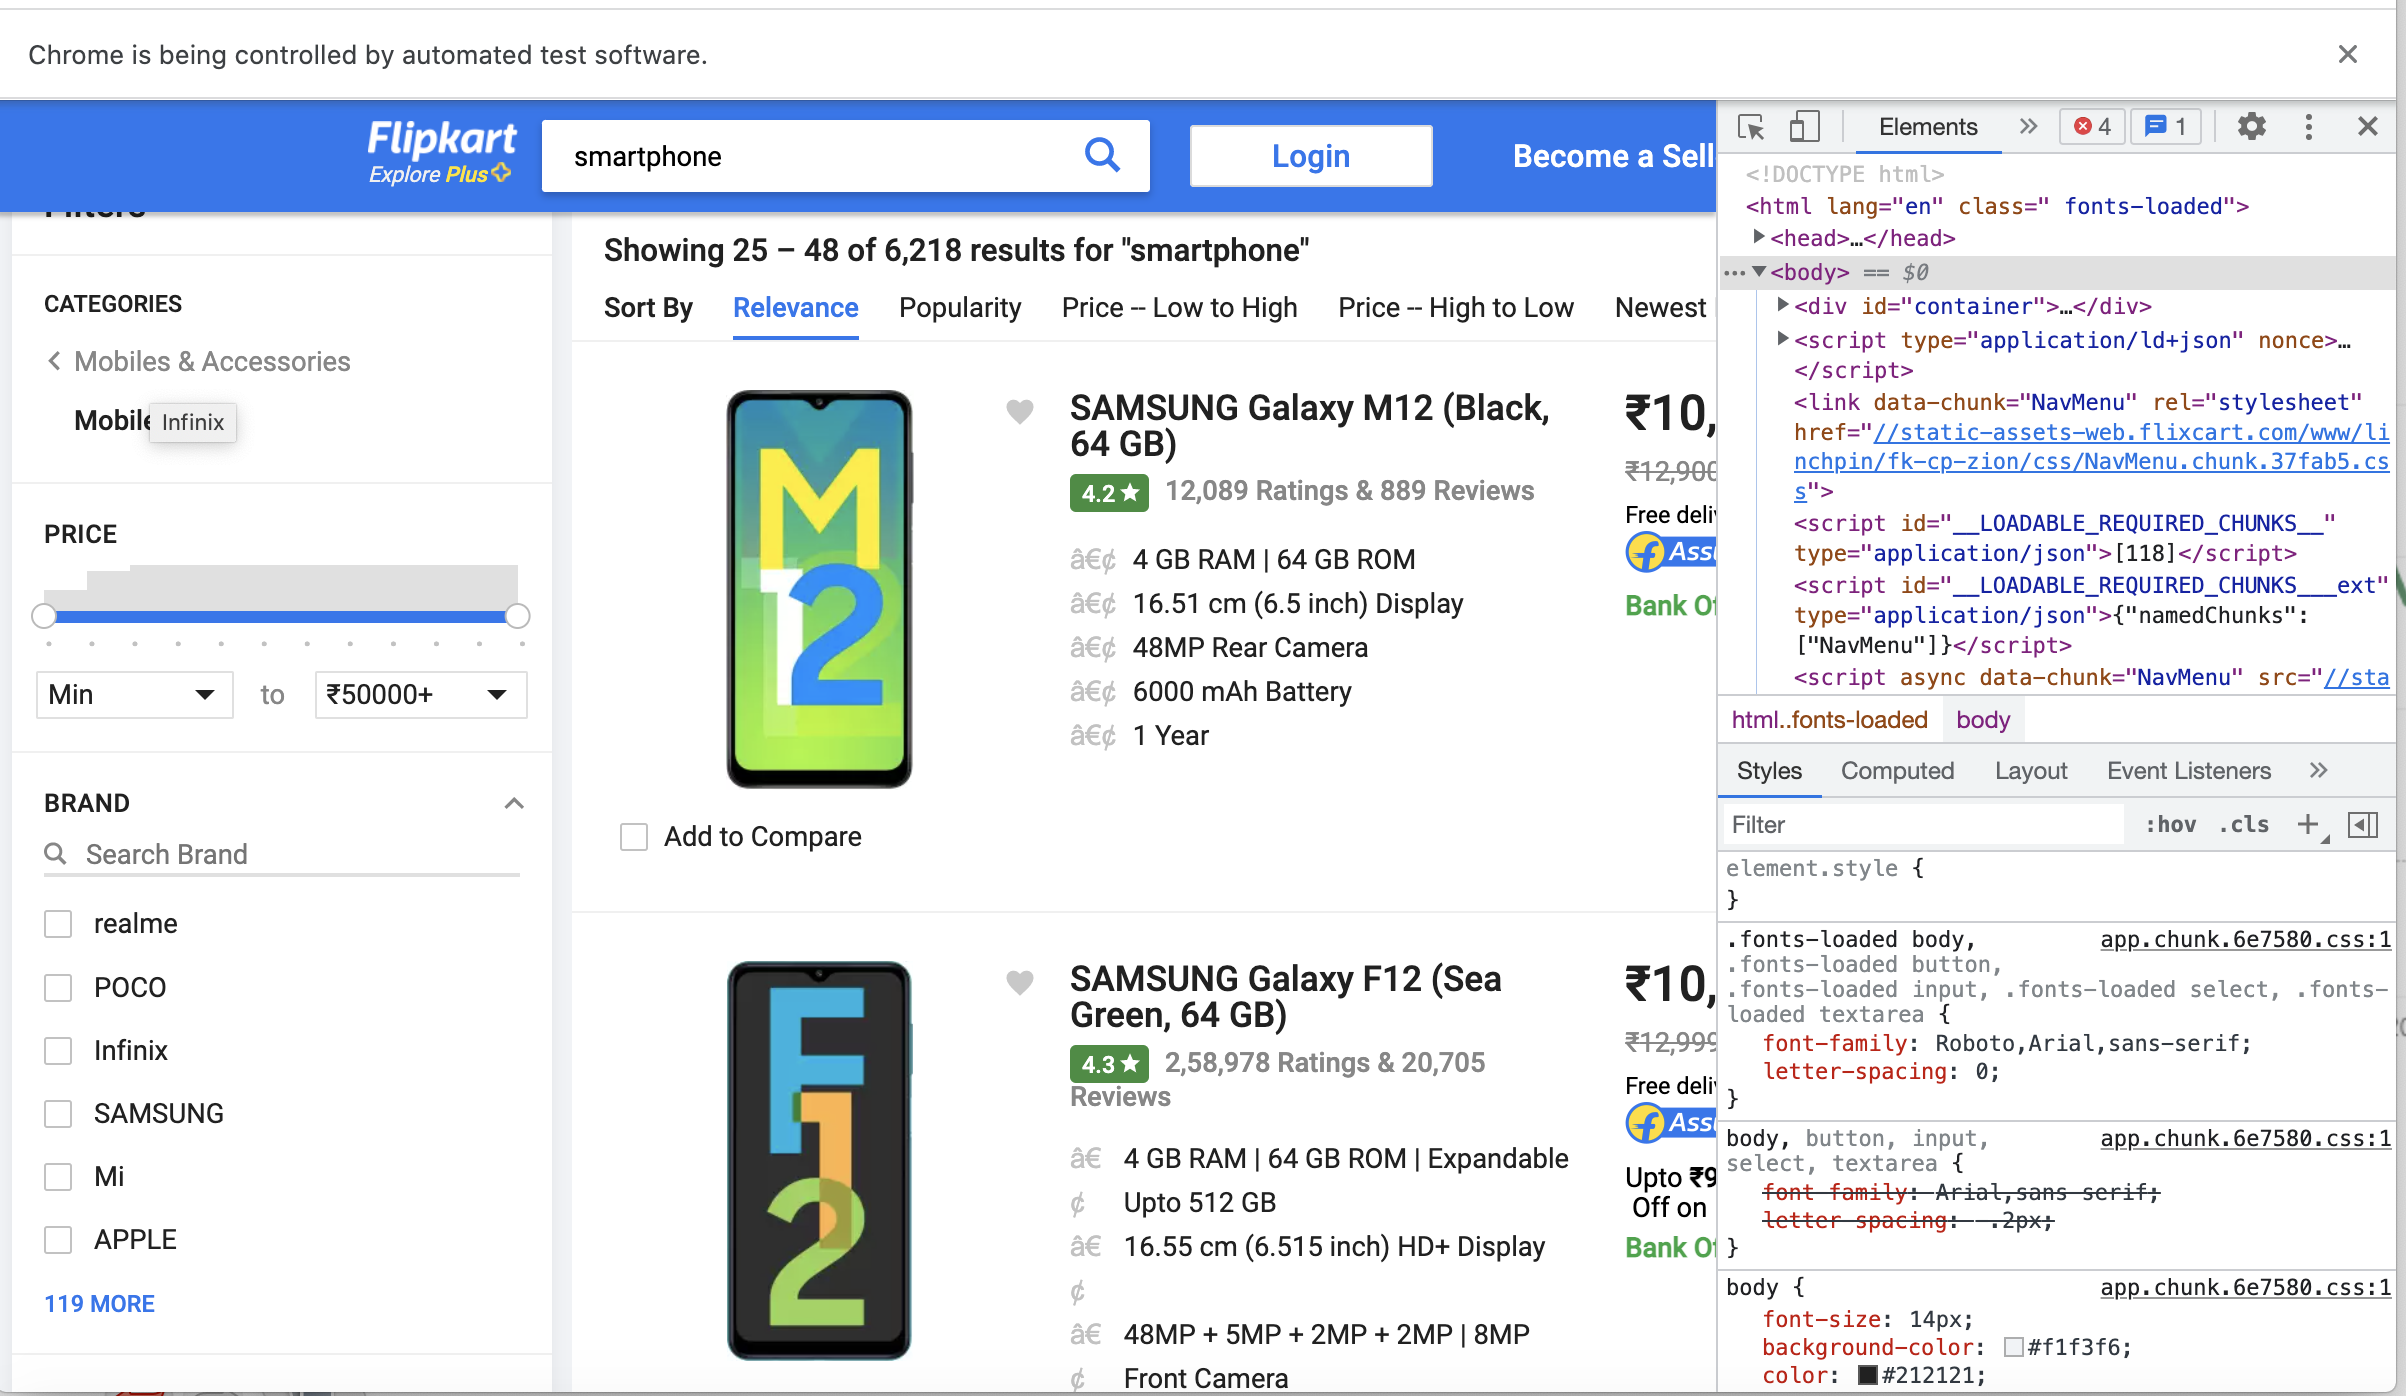

In [37]:
mobile_dataframe.to_csv('mobiles.csv')

In [2]:
import pandas as pd
mobile_dataframe = pd.read_csv('mobiles.csv')

In [3]:
mobile_dataframe

Unnamed: 0                                       Name  \
0            0               POCO C31 (Royal Blue, 64 GB)   
1            1              POCO C31 (Shadow Gray, 64 GB)   
2            2         realme C11 2021 (Cool Grey, 32 GB)   
3            3         realme C11 2021 (Cool Blue, 64 GB)   
4            4         realme C11 2021 (Cool Grey, 64 GB)   
5            5         realme C11 2021 (Cool Blue, 32 GB)   
6            6            OPPO K10 (Black Carbon, 128 GB)   
7            7     SAMSUNG Galaxy F22 (Denim Blue, 64 GB)   
8            8            OPPO K10 (Black Carbon, 128 GB)   
9            9    SAMSUNG Galaxy F22 (Denim Black, 64 GB)   
10          10   REDMI Note 10T 5G (Metallic Blue, 64 GB)   
11          11       vivo T1 5G (Starlight Black, 128 GB)   
12          12       vivo T1 5G (Rainbow Fantasy, 128 GB)   
13          13    Infinix Note 11 (Graphite Black, 64 GB)   
14          14              POCO C31 (Shadow Gray, 32 GB)   
15          15    SAMSUNG Galaxy F22 (Denim Blue, 128 GB)   
16          16          REDMI 10 (Caribbean Green, 64 GB)   
17          17  REDMI Note 10T 5G (Chromium White, 64 GB)   
18          18          realme C35 (Glowing Black, 64 GB)   
19          19          realme C35 (Glowing Green, 64 GB)   
20          20      REDMI Note 10T 5G (Mint Green, 64 GB)   
21          21      REDMI 9i Sport (Metallic Blue, 64 GB)   
22          22           REDMI 10 (Midnight Black, 64 GB)   
23          23       vivo T1 5G (Rainbow Fantasy, 128 GB)   

                                                Image  \
0   https://rukminim2.flixcart.com/image/312/312/k...   
1   https://rukminim2.flixcart.com/image/312/312/k...   
2   https://rukminim2.flixcart.com/image/312/312/k...   
3   https://rukminim2.flixcart.com/image/312/312/k...   
4   https://rukminim2.flixcart.com/image/312/312/k...   
5   https://rukminim2.flixcart.com/image/312/312/k...   
6   https://rukminim2.flixcart.com/image/312/312/l...   
7   https://rukminim2.flixcart.com/image/312/312/k...   
8   https://rukminim2.flixcart.com/image/312/312/l...   
9   https://rukminim2.flixcart.com/image/312/312/k...   
10  https://rukminim2.flixcart.com/image/312/312/l...   
11  https://rukminim2.flixcart.com/image/312/312/k...   
12  https://rukminim2.flixcart.com/image/312/312/k...   
13  https://rukminim2.flixcart.com/image/312/312/k...   
14  https://rukminim2.flixcart.com/image/312/312/k...   
15  https://rukminim2.flixcart.com/image/312/312/k...   
16  https://rukminim2.flixcart.com/image/312/312/l...   
17  https://rukminim2.flixcart.com/image/312/312/l...   
18  https://rukminim2.flixcart.com/image/312/312/l...   
19  https://rukminim2.flixcart.com/image/312/312/l...   
20  https://rukminim2.flixcart.com/image/312/312/l...   
21  https://rukminim2.flixcart.com/image/312/312/k...   
22  https://rukminim2.flixcart.com/image/312/312/l...   
23  https://rukminim2.flixcart.com/image/312/312/k...   

                             Ratings  \
0     46,696 Ratings & 2,637 Reviews   
1     46,696 Ratings & 2,637 Reviews   
2   1,87,581 Ratings & 8,514 Reviews   
3   1,63,258 Ratings & 9,286 Reviews   
4   1,63,258 Ratings & 9,286 Reviews   
5   1,87,581 Ratings & 8,514 Reviews   
6     12,073 Ratings & 1,093 Reviews   
7     54,535 Ratings & 5,362 Reviews   
8           959 Ratings & 98 Reviews   
9     54,535 Ratings & 5,362 Reviews   
10       4,740 Ratings & 224 Reviews   
11    17,665 Ratings & 1,638 Reviews   
12    33,444 Ratings & 3,183 Reviews   
13    16,982 Ratings & 2,288 Reviews   
14    39,228 Ratings & 2,277 Reviews   
15    34,370 Ratings & 3,121 Reviews   
16       8,000 Ratings & 482 Reviews   
17       4,740 Ratings & 224 Reviews   
18    34,636 Ratings & 2,131 Reviews   
19    34,636 Ratings & 2,131 Reviews   
20       4,740 Ratings & 224 Reviews   
21    93,325 Ratings & 5,213 Reviews   
22       8,000 Ratings & 482 Reviews   
23    17,665 Ratings & 1,638 Reviews   

                                              RAM  